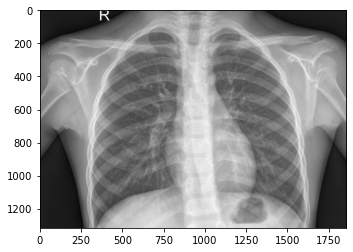

In [1]:
import tensorflow
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

DATADIR = r"C:\Users\sulut\OneDrive\Documents\Data\chest_xray"
ogAddy = os.listdir(DATADIR)

testDir= r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\test'
testNormalDir = r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\test\NORMAL'
testPneumoniaDir = r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\test\PNEUMONIA'

trainDir= r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\train'
trainNormalDir = r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\train\NORMAL'
trainPneumoniaDir= r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\train\PNEUMONIA'

valDir= r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\val'
valNormalDir= r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\val\NORMAL'
valPneumoniaDir= r'C:\Users\sulut\OneDrive\Documents\Data\chest_xray\val\PNEUMONIA'   
   
splits = ['test','train','val']
categories = ['NORMAL','PNEUMONIA']

for split in splits:
    path = os.path.join(DATADIR,split)
    for category in categories:
        path = os.path.join(path,category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array,cmap='gray')
            plt.show()
            break
        break
    break



In [2]:
print(img_array)

[[ 0 32 33 ... 33 34  0]
 [ 0 33 33 ... 34 34  0]
 [ 1 33 33 ... 34 34  0]
 ...
 [ 0 28 28 ... 34 35  0]
 [ 0 29 28 ... 34 35  0]
 [ 0 29 29 ... 35 34  0]]


In [3]:
print(img_array.shape)

(1317, 1857)


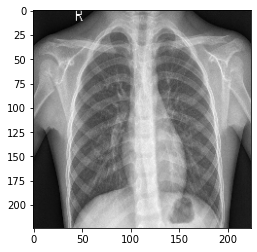

In [4]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:
path = ''
training_data = []
training_labels = []

def create_training_data():
    for category in categories: 

        path = os.path.join(trainDir,category) 
        class_num = category.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                name = os.path.basename(path)
                if name == 'NORMAL':
                    class_num = 0
                    
                elif name == 'PNEUMONIA':
                    class_num = 1

                else: class_num = 2
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append(new_array)
                training_labels.append(class_num) 
            except Exception as e:  
                pass


create_training_data()
print(len(training_data))
print(len(training_labels))

100%|██████████| 3875/3875 [00:31<00:00, 121.86it/s]

5216
5216


In [6]:
print(training_data[1340])

[[157   1  88 ...  68  73  74]
 [  3   2  13 ...  71  70  80]
 [107   5 213 ...  75  78  80]
 ...
 [ 16  32  33 ...  36  33  26]
 [ 23  20  29 ...  35  26  28]
 [ 23  19  22 ...  26  32  28]]


In [7]:
import random
c = list(zip(training_data, training_labels))

random.shuffle(c)

training_data , training_labels = zip(*c)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

[130 114 105 101  83 100  95  86  78  75  63  37  39  40  47  48  53  50
  50  51  53  53  41  42  43  45  46  47  43  45  46  47  47  50  50  50
  49  51  49  49  49  49  49  44  51  49  53  54  52  58  57  61  61  64
  62  64  64  66  67  67  67  67  66  70  74  77  79  76  75  77  76  74
  77  85  87  85  76  73  70  69  69  69  74  74  72  69  72  76  72  72
  70  77  70  76  70  69  66  66  69  64  85  83  90  76  75  84  94  95
  93  95  99  96  99  98  98  94  93  87  85  95  94 103 108 111 107 105
 107 108 106 107 104 105 107 103 103 104 103 104 107 107 115 115 114 123
 127 133 141 137 132 132 131 130 129 126 129 129 135 136 139 140 142 153
 143 144 147 143 128 131 125 121 128 117 119 108 109 113 110 104  98  97
  88  75  71  74  62  63  67  69  69  72  72  69  64  72  71  71  67  67
  49  34  27  20  25  22  27  24  27  70  82  66  66  65  92  86  94 111
 117 124 126 132 119 158 147 153]
[190 185 184 175 171 137 145 125  73  57  15  39  31  32  37  15  18  21
  22  23  24  24 

In [9]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

NameError: name 'X' is not defined

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(training_labels, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
path = ''
test_data = []

def create_test_data():
    for category in categories:  

        path = os.path.join(testDir,category) 
        class_num = category.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                name = os.path.basename(path)
                if name == 'NORMAL':
                    class_num = 0
                    
                elif name == 'PNEUMONIA':
                    class_num = 1

                else: class_num = 2
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                test_data.append([new_array, class_num]) 
            except Exception as e: 
                pass


create_test_data()
print(len(test_data))

In [ ]:
path = ''
val_data = []

def create_val_data():
    for category in categories: 

        path = os.path.join(valDir,category)  
        class_num = category.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                name = os.path.basename(path)
                if name == 'NORMAL':
                    class_num = 0
                    
                elif name == 'PNEUMONIA':
                    class_num = 1

                else: class_num = 2
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                val_data.append([new_array, class_num])  
            except Exception as e:  
                pass


create_val_data()
print(len(val_data))